In [1]:
#test
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
#create data to test algorithm:
X = np.random.random((100,3))

In [3]:
#initialize centroids
def initialize(k, data):
    centroids = np.zeros((k, data.shape[-1]))
    for i in range(k):
        centroids[i] = data[np.random.choice(data.shape[0], replace=False)];
    return centroids

centroids = initialize(3, X)
#centroids

In [4]:
#calculate distances
def compute_dist(data, k, centroids):
    idx = np.zeros((data.shape[0], 1))
    c = np.zeros((data.shape[0], k))
    for i in range(k):
        cent = centroids[i]
        a = np.ones((len(data), 1))*cent
        b = np.sum(((data - a)**2), axis=1)
        c[:, i] = b
    idx = np.argmin(c, axis=1)
    return idx


test1 = compute_dist(X, 3, centroids)
#test1

In [5]:
#move centroids:
def move_centroids(k, index, data):
    new_centroids = np.zeros((k, data.shape[-1]))
    for i in range(k):
        idx_i = np.where(index == i)
        label_i = data[idx_i]
        new_centroids[i] = np.mean(label_i, axis=0)
    return new_centroids

testing = move_centroids(3, test1, X)
#testing

In [6]:
def runkmeans(k, data, n_iterations):
    centroids = initialize(k, data)
    init_centroids = centroids    #for comparison purposes
    idx = np.zeros((k, 1))
    for i in range(n_iterations):
        idx = compute_dist(data, k, centroids)
        centroids = move_centroids(k, idx, data)
        return idx.astype(int), centroids, init_centroids;

testrun, final_cent, init_cent = runkmeans(5, X, 10)
print(final_cent)
print(init_cent)

[[0.14548791 0.49218538 0.27441982]
 [0.59553288 0.84199343 0.69074192]
 [0.26315995 0.46222134 0.7843438 ]
 [0.83188719 0.24491362 0.69184714]
 [0.72384976 0.48520251 0.22394127]]
[[0.07341116 0.27314636 0.23904793]
 [0.81285141 0.80817592 0.88560075]
 [0.37993624 0.32509379 0.81143091]
 [0.94531808 0.14943189 0.83209637]
 [0.67128438 0.37171031 0.0672161 ]]


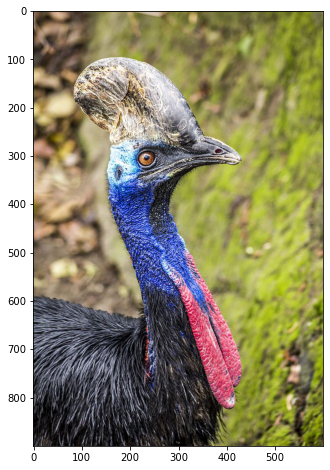

In [45]:
#now time for image compression
img = mpimg.imread('Test_Image_Cassowary.jpg')
img_size = img.shape
img = img / 255;

img_data = img.reshape(img_size[0]*img_size[1], 3)
#img_data.shape = (540000x3)
#print(img_data[0:3])

fig = plt.figure(figsize=(10,8))
plt.imshow(img)

In [30]:
comp_32_bit, centroids_32, c32_initial = runkmeans(32, img_data, 10)

In [46]:
comp_16_bit, centroids_16, c16_initial = runkmeans(16, img_data, 15)

In [32]:
comp_8_bit, centroids_8, c8_initial = runkmeans(8, img_data, 10)

In [47]:
recovered_32 = centroids_32[comp_32_bit, :]
#recovered_32.shape = (540000x3)
plot_img_32 = recovered_32.reshape((900, 600, 3))

recovered_16 = centroids_16[comp_16_bit, :]
plot_img_16 = recovered_16.reshape((900, 600, 3))

recovered_8 = centroids_8[comp_8_bit, :]
plot_img_8 = recovered_8.reshape((900, 600, 3))

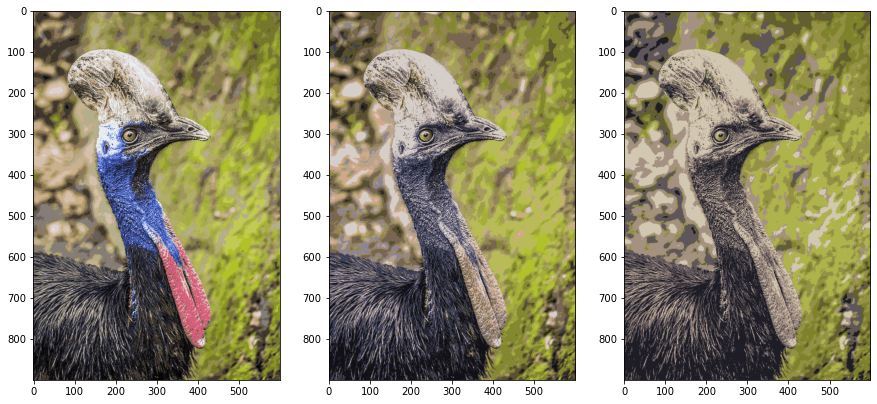

In [48]:
#visualize:
fig = plt.figure(figsize=(15, 10))
plt.subplot(1,3,1)
plt.imshow(plot_img_32);

plt.subplot(1,3,2)
plt.imshow(plot_img_16);

plt.subplot(1,3,3)
plt.imshow(plot_img_8);